# qthist2d Examples

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [15]:
from qthist2d import qthist, qtcount


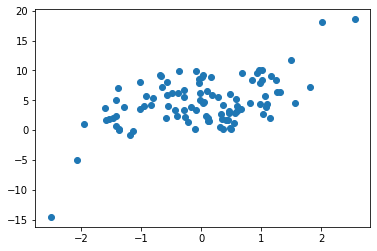

In [23]:
Npts = 100
x = np.random.normal(size=Npts)
y = np.random.random(size=Npts)*10 + x**3

plt.scatter(x,y)


In [24]:
num, xmin, xmax, ymin, ymax = qthist(x,y, N=5, thresh=4)


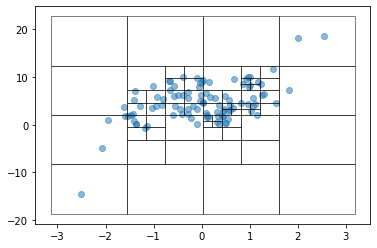

In [25]:
fig = plt.figure()

ax = fig.add_subplot(111)

plt.scatter(x,y, alpha=0.5)

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc ='none', ec='k', alpha=0.5))

In [26]:
# by default, computes the probability density of sources,
# very comprable to a normal histogram2d
num, xmin, xmax, ymin, ymax = qthist(x,y, N=5, thresh=4, density=True)

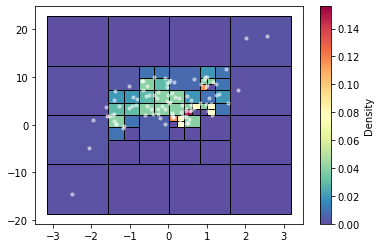

In [27]:
fig = plt.figure()

ax = fig.add_subplot(111)

CMAP = plt.cm.Spectral_r

clr = (num - np.nanmin(num)) / (np.nanmax(num) - np.nanmin(num))

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc =CMAP(clr[k]), ec='k', alpha=1))

# create a fake image, just to invoke colormap
img = plt.imshow(np.array([[0,1]]), cmap=CMAP, aspect='auto',origin='lower', 
                 vmin=num.min(),vmax=num.max()) # scale to the density
img.set_visible(False) # throw this away
cb = plt.colorbar()
cb.set_label('Density')

plt.scatter(x,y,  c='w', alpha=0.5, zorder=2, s=10)


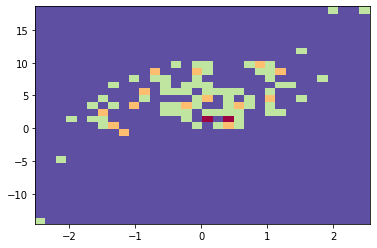

In [28]:
# for comparison, here is a normal histogram at the smallest scale used for the QuadTree Hist
_ = plt.hist2d(x,y, bins = 2**5, cmap=plt.cm.Spectral_r)

In [29]:
# you can also use the existing grid to e.g. count the density of another set of (x,y) data in these bins

Npts = 100
x2 = np.random.normal(size=Npts) + 1
y2 = -np.random.random(size=Npts)*10 + x**2

num2 = qtcount(x2, y2, xmin, xmax, ymin, ymax, density=True)

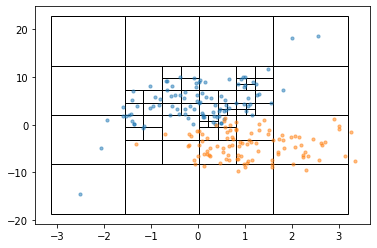

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

CMAP = plt.cm.Spectral_r
clr = (num2 - np.nanmin(num2)) / (np.nanmax(num2) - np.nanmin(num2))

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc ='none', ec='k', alpha=1))

plt.scatter(x,y,  c='C0', alpha=0.5, zorder=2, s=10)
plt.scatter(x2,y2,  c='C1', alpha=0.5, zorder=2, s=10)



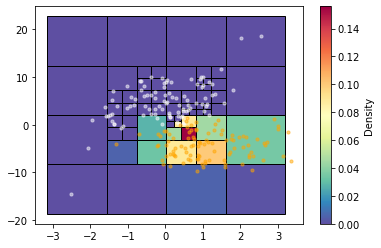

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

CMAP = plt.cm.Spectral_r
clr = (num2 - np.nanmin(num2)) / (np.nanmax(num2) - np.nanmin(num2))

for k in range(len(num)):
    ax.add_patch(plt.Rectangle((xmin[k], ymin[k]), xmax[k]-xmin[k], ymax[k]-ymin[k], 
                               fc =CMAP(clr[k]), ec='k', alpha=1))

# create a fake image, just to invoke colormap
img = plt.imshow(np.array([[0,1]]), cmap=CMAP, aspect='auto',origin='lower', 
                 vmin=num.min(),vmax=num.max()) # scale to the density
img.set_visible(False) # throw this away
cb = plt.colorbar()
cb.set_label('Density')


plt.scatter(x,y,  c='w', alpha=0.5, zorder=2, s=10)
plt.scatter(x2,y2,  c='orange', alpha=0.5, zorder=2, s=10)


In [ ]:
# note the bins were set to contain all data in the first dataset,
# so if the new data fall outside the bins, it doesn't get counted
# just like in a normal histogram